<a href="https://colab.research.google.com/github/pouyyan/ML_Course_2024/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 part 2

### Modules

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

### Creating Dataset

(1000, 3) (1000,)


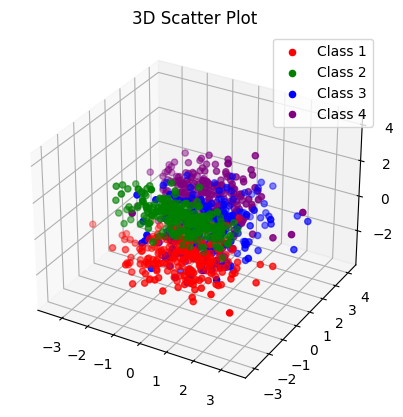

In [ ]:
X, y = make_classification(n_samples = 1000,
                           n_classes = 4,
                           n_features = 3,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           class_sep = 1,#2,0.1,
                           random_state = 6)
print(X.shape, y.shape)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Set labels for each class
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Set colors for each class
class_colors = ['r', 'g', 'b', 'purple']

for i in range(4):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], c=class_colors[i], label=f'Class {i+1}')

# Show the legend
ax.legend()

# Set title
plt.title("3D Scatter Plot")

# Show the plot
plt.show()

# Question 1 part 3
### 1. Logistic Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression(random_state = 6)
model.fit(x_train,y_train)

print(f'Accuracy of train data in Logistic Regression = {model.score(x_train, y_train)}')
print(f'Accuracy of test data in Logistic Regression = {model.score(x_test, y_test)}')

(800, 3) (200, 3) (800,) (200,)
Accuracy of train data in Logistic Regression = 0.81
Accuracy of test data in Logistic Regression = 0.83


### 2. SGDClassifier

In [56]:
model1 = SGDClassifier(random_state = 6)
model1.fit(x_train,y_train)

print(f'Accuracy of train data in SGD Classifier = {model1.score(x_train, y_train)}')
print(f'Accuracy of test data in SGD Classifier = {model1.score(x_test, y_test)}')

Accuracy of train data in SGD Classifier = 0.70375
Accuracy of test data in SGD Classifier = 0.695


In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00


### 3. Ligistic Regression with Tuned Hyperparameters

In [ ]:
from skopt import BayesSearchCV
# Define Hyperparameters Search Space
search_space = {'C': (1e-6, 1e+6, 'log-uniform'),        # Regularization Parameter
                'penalty': ['l1', 'l2'],                 # Type of Regularization
                'solver': ['liblinear', 'saga'] # Optimization Algorithm
                }

# Initialize the BayesSearchCV Object
opt = BayesSearchCV(estimator = model,
                    search_spaces = search_space,
                    n_iter = 50, # Number of iterations for optimizations
                    cv = 5,      # Number of Cross-validation folds
                    n_jobs = -1, # Use all available CPU cores
                    verbose = 1  # Set to 1 for progress updates
                    )

# Fix the model to the data
opt.fit(x_train, y_train)

print(f"Best Hyperparameters : {opt.best_params_}")
accuracy_train = opt.score(x_train, y_train)
accuracy_test = opt.score(x_test, y_test)
print(f"Train set accuracy: {accuracy_train:.4f}")
print(f"Test set accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### 4. SGD Classifier with Tuned Hyperparameters

In [ ]:
from skopt import BayesSearchCV

# Define the hyperparameter search space
search_space = {
    'alpha': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
    'loss': ['hinge', 'log_loss', 'modified_huber'],  # Loss function
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': (1e-6, 1e-2, 'log-uniform')  # Initial learning rate
}

# Initialize the BayesSearchCV object
opt = BayesSearchCV(
    estimator=model1,
    search_spaces=search_space,
    n_iter=50,  # Number of iterations for optimization
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1   # Set to 1 for progress updates
)

# Fit the model to the data
opt.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", opt.best_params_)

accuracy_train = opt.score(x_train, y_train)
accuracy_test = opt.score(x_test, y_test)
print(f"Train set accuracy: {accuracy_train:.4f}")
print(f"Test set accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Question 1 part 4

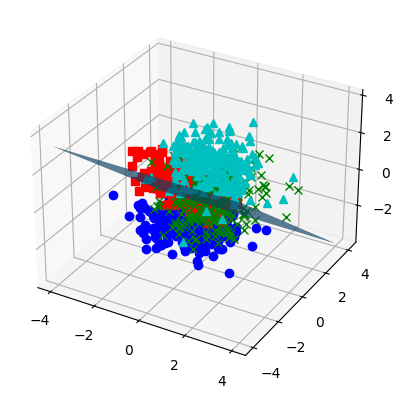

In [50]:
from mpl_toolkits.mplot3d import Axes3D

z1 = lambda x1,y1: (-model.intercept_[0]-model.coef_[0][0]*x1-model.coef_[0][1]*y1) / model.coef_[0][2]

tmp = np.linspace(-4,4,100)
x1,y1 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, z1(x1,y1))

ax.plot3D(X[y==0,0], X[y==0,1], X[y==0,2],'ob')
ax.plot3D(X[y==1,0], X[y==1,1], X[y==1,2],'sr')
ax.plot3D(X[y==2,0], X[y==2,1], X[y==2,2],'xg')
ax.plot3D(X[y==3,0], X[y==3,1], X[y==3,2],'^c')

# Set the initial view angle for rotation
# ax.view_init(elev=90, azim=0)

plt.show()

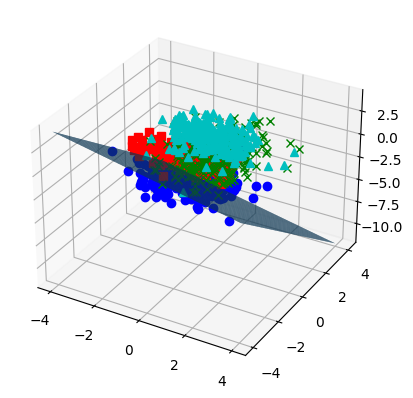

In [58]:
z2 = lambda x2,y2: (-model1.intercept_[0]-model1.coef_[0][0]*x1-model1.coef_[0][1]*y1) / model1.coef_[0][2]

tmp = np.linspace(-4,4,100)
x2,y2 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2, y2, z2(x2,y2))

ax.plot3D(X[y==0,0], X[y==0,1], X[y==0,2],'ob')
ax.plot3D(X[y==1,0], X[y==1,1], X[y==1,2],'sr')
ax.plot3D(X[y==2,0], X[y==2,1], X[y==2,2],'xg')
ax.plot3D(X[y==3,0], X[y==3,1], X[y==3,2],'^c')

# Set the initial view angle for rotation
# ax.view_init(elev=90, azim=0)

plt.show()

# Question 1 part 5

In [ ]:
!pip install drawdata
!pip install pandas polars

## Scatter Draw

In [ ]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
# Get the drawn data as a list of dictionaries
widget.data

# Get the drawn data as a dataframe
W_df = widget.data_as_pandas
W_df

,x,y,color,label
0,357.077023,377.789290,#1f77b4,a
1,341.115856,368.737624,#1f77b4,a
2,372.833611,377.675511,#1f77b4,a
3,345.085066,388.315922,#1f77b4,a
4,321.383828,395.134902,#1f77b4,a
...,...,...,...,...
1016,159.243243,136.370172,#1f77b4,a
1017,175.406668,168.305111,#1f77b4,a
1018,187.638541,129.183582,#1f77b4,a
1019,177.817786,165.886539,#1f77b4,a


<ipython-input-37-557893dab801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target.replace('a', 1, inplace=True)
<ipython-input-37-557893dab801>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target.replace('b', 0, inplace=True)


(1021,)


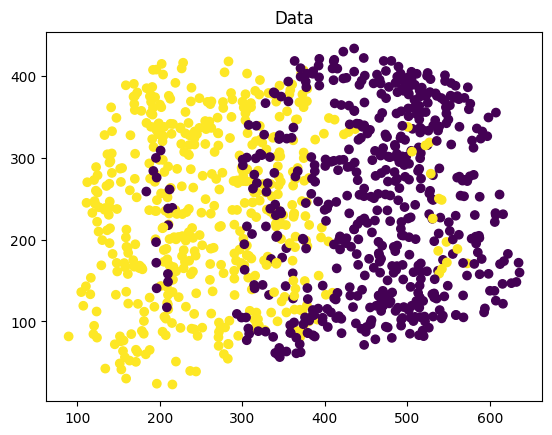

In [ ]:
Class = W_df[['x','y']]
Target = W_df[['label']]
Target.replace('a', 1, inplace=True)
Target.replace('b', 0, inplace=True)
target = Target.to_numpy()
Target = np.ravel(Target)
print(Target.shape)
plt.figure()
plt.scatter(Class['x'], Class['y'], c = target)
plt.title('Data')
plt.show()

## Linear Classification

In [ ]:
# Spliting train data and test data
Class_train, Class_test, target_train, target_test = train_test_split(Class, Target, test_size = 0.2, random_state = 6)

LR = LogisticRegression(random_state = 6)
LR.fit(Class_train,target_train)
print(f'Accuracy of train data in Logistic Regression Classifier = {LR.score(Feature_train, target_train)}')
print(f'Accuracy of test data in Logistic Regression Classifier = {LR.score(Feature_test, target_test)}')

SGD = SGDClassifier(random_state = 6)
SGD.fit(Class_train,target_train)
print(f'Accuracy of train data in SGD Classifier = {SGD.score(Feature_train, target_train)}')
print(f'Accuracy of test data in SGD Classifier = {SGD.score(Feature_test, target_test)}')

Accuracy of train data in Logistic Regression Classifier = 0.8455882352941176
Accuracy of test data in Logistic Regression Classifier = 0.8536585365853658
Accuracy of train data in SGD Classifier = 0.7169117647058824
Accuracy of test data in SGD Classifier = 0.6926829268292682


## Optimizing Hyperparametres

In [ ]:
!pip install scikit-optimize

### Linear Regression Hyperparameter optimization

In [ ]:
from skopt import BayesSearchCV
# Define Hyperparameters Search Space
search_space = {'C': (1e-6, 1e+6, 'log-uniform'),        # Regularization Parameter
                'penalty': ['l1', 'l2'],                 # Type of Regularization
                'solver': ['liblinear', 'saga'] # Optimization Algorithm
                }

# Initialize the BayesSearchCV Object
opt = BayesSearchCV(estimator = LR,
                    search_spaces = search_space,
                    n_iter = 50, # Number of iterations for optimizations
                    cv = 5,      # Number of Cross-validation folds
                    n_jobs = -1, # Use all available CPU cores
                    verbose = 1  # Set to 1 for progress updates
                    )

# Fix the model to the data
opt.fit(Class_train, target_train)

print(f"Best Hyperparameters : {opt.best_params_}")
accuracy_train = opt.score(Class_train, target_train)
accuracy_test = opt.score(Class_test, target_test)
print(f"Train set accuracy: {accuracy_train:.4f}")
print(f"Test set accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
from skopt import BayesSearchCV
# Define Hyperparameters Search Space
search_space = {
    'alpha': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
    'loss': ['hinge', 'log_loss', 'modified_huber'],  # Loss function
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': (1e-6, 1e-2, 'log-uniform')  # Initial learning rate
}

# Initialize the BayesSearchCV Object
opt = BayesSearchCV(estimator = SGD,
                    search_spaces = search_space,
                    n_iter = 50, # Number of iterations for optimizations
                    cv = 5,      # Number of Cross-validation folds
                    n_jobs = -1, # Use all available CPU cores
                    verbose = 1  # Set to 1 for progress updates
                    )

# Fix the model to the data
opt.fit(Class_train, target_train)

print(f"Best Hyperparameters : {opt.best_params_}")
accuracy_train = opt.score(Class_train, target_train)
accuracy_test = opt.score(Class_test, target_test)
print(f"Train set accuracy: {accuracy_train:.4f}")
print(f"Test set accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SGD Classifier')

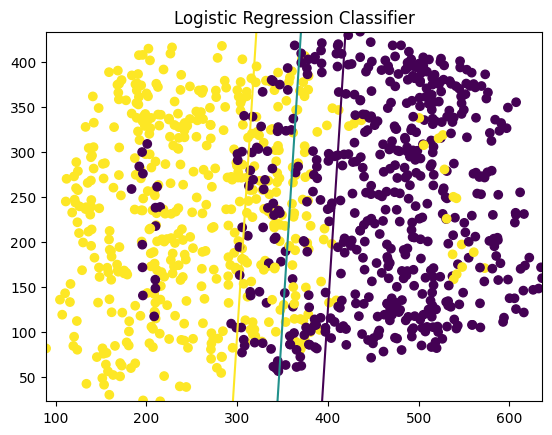

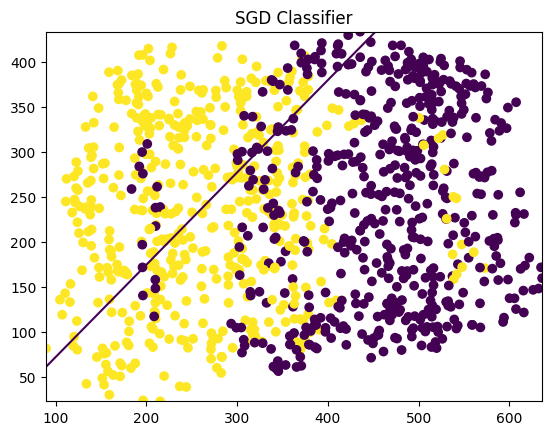

In [ ]:
x1_min, x2_min = Class.min(0)
x1_max, x2_max = Class.max(0)

n = 500

x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)

x1m, x2m = np.meshgrid(x1r, x2r)
Xm = np.stack((x1m.flatten(), x2m.flatten()), axis = 1)

DB1 = LR.decision_function(Xm)

plt.figure()
plt.scatter(Class['x'], Class['y'], c = target)
plt.contour(x1m, x2m, DB1.reshape(x1m.shape), levels = [-1, 0, 1])
plt.title('Logistic Regression Classifier')

DB2 = SGD.decision_function(Xm)

plt.figure()
plt.scatter(Class['x'], Class['y'], c = target)
plt.contour(x1m, x2m, DB2.reshape(x1m.shape), levels = [0])
plt.title('SGD Classifier')

# Question 2 part 1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1G_7dnU79lEr8cTrWxjxa6zEs_b6dWDHi
# https://drive.google.com/file/d/1G_7dnU79lEr8cTrWxjxa6zEs_b6dWDHi/view?usp=sharing
# 107

!gdown 1qDhN98YtMJSnB2B8z8BzaDwWm5GjxuLb
# https://drive.google.com/file/d/1qDhN98YtMJSnB2B8z8BzaDwWm5GjxuLb/view?usp=sharing
# 99

Downloading...
From (original): https://drive.google.com/uc?id=1G_7dnU79lEr8cTrWxjxa6zEs_b6dWDHi
From (redirected): https://drive.google.com/uc?id=1G_7dnU79lEr8cTrWxjxa6zEs_b6dWDHi&confirm=t&uuid=613a33c4-9592-4e68-a394-57cbf67a3467
To: /content/107.mat
100% 2.93M/2.93M [00:00<00:00, 112MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qDhN98YtMJSnB2B8z8BzaDwWm5GjxuLb
From (redirected): https://drive.google.com/uc?id=1qDhN98YtMJSnB2B8z8BzaDwWm5GjxuLb&confirm=t&uuid=dd84ac06-e38d-4b6d-888c-2677194aafec
To: /content/99.mat
100% 15.5M/15.5M [00:00<00:00, 50.3MB/s]


In [ ]:
import scipy.io as sio

Normal_data = sio.loadmat("99.mat")
Fault_data = sio.loadmat("107.mat")

# print(Normal_data)
# print(Fault_data)

Normal_data_df = pd.DataFrame(Normal_data['X099_DE_time'])
Fault_data_df = pd.DataFrame(Fault_data['X107_DE_time'])
print('Normal_data: ',Normal_data_df.shape,'\n')
print('Fault_data: ',Fault_data_df.shape)

Normal_data:  (485063, 1) 

Fault_data:  (122136, 1)


# Question 2 part 2

In [ ]:
# M is the number of samples
M = 200
# N is the window size
N = 400
Output = []
np.random.seed(0)

cnt = 0
index_list = []
while cnt < M:
  index = np.random.choice(len(Normal_data_df))
  if len(Normal_data_df) - index > N:
    cnt += 1
    index_list.append(index)
    Output.append(1)

cnt = 0
index_list1 = []
while cnt < M:
  index1 = np.random.choice(len(Fault_data_df))
  if len(Fault_data_df) - index1 > N:
    cnt += 1
    index_list1.append(index1)
    Output.append(0)


In [ ]:
Normal_data_numpy = Normal_data_df.to_numpy()
Normal_data_numpy = Normal_data_numpy.reshape(-1,len(Normal_data_numpy))

Fault_data_numpy = Fault_data_df.to_numpy()
Fault_data_numpy = Fault_data_numpy.reshape(-1,len(Fault_data_numpy))

In [ ]:
Array_Normal_data = np.zeros((M,N))
for index, element in enumerate(index_list):
  seq_Normal_data = Normal_data_numpy[0, element:element+N]
  Array_Normal_data[index-1,:] = seq_Normal_data
  # Labeling Fault output as 1

Array_Fault_data = np.zeros((M,N))
for index1, element1 in enumerate(index_list1):
  seq_Fault_data = Fault_data_numpy[0, element1:element1+N]
  Array_Fault_data[index1-1,:] = seq_Fault_data
  # Labeling Fault output as 0

Output = np.array(Output)
Output = Output.reshape(2*M, 1)
print(Output.shape)
Data_matrix = np.concatenate((Array_Normal_data, Array_Fault_data), axis=0)
Data_matrix.shape

(400, 1)


(400, 400)

## Feature Extraction

In [ ]:
import scipy.stats as stats

def calculate_row_stats(Input_matrix):
  mean = np.mean(Input_matrix, axis=1)[:, np.newaxis]
  std = np.std(Input_matrix, axis=1)[:, np.newaxis]
  ptp = np.ptp(Input_matrix, axis=1)[:, np.newaxis]
  kurt = stats.kurtosis(Input_matrix, axis=1)[:, np.newaxis]
  skew = stats.skew(Input_matrix, axis=1)[:, np.newaxis]
  rms = np.sqrt(np.mean(Input_matrix**2, axis=1))[:, np.newaxis]
  # Calculate absolute minimum for each row
  abs_mean = np.amin(Input_matrix, axis=1)[:, np.newaxis]
  # Calculate impact factor (assuming difference between max and min)
  peak = np.amax(Input_matrix, axis=1)[:, np.newaxis]
  # Combine into a new matrix
  result_matrix = np.concatenate((mean, std, ptp, kurt, skew, rms, abs_mean, peak), axis=1)
  return result_matrix

stats_matrix = calculate_row_stats(Data_matrix)

# Print the resulting matrix (containing means and standard deviations)
print(stats_matrix.shape)

(400, 8)


## Shuffling

In [ ]:
from sklearn.utils import shuffle
Class_shuffle, Target_shuffle = shuffle(stats_matrix, Output, random_state = 6)

Data_train, Data_test, Target_train, Target_test = train_test_split(Class_shuffle, Target_shuffle, test_size = 0.2, random_state = 6)
Data_train.shape, Data_test.shape, Target_train.shape, Target_test.shape

((320, 8), (80, 8), (320, 1), (80, 1))

## Normalization

In [ ]:
MMS = MinMaxScaler()
Data_train_Scaled = MMS.fit_transform(Data_train)
Data_test_Scaled = MMS.fit_transform(Data_test)

# Question 2 Part 3

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def logistic_regression(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat

def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat - y))/len(y)
  return grads

def gradient_descent(w, eta, grads):
  w -= eta*grads
  return w

def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat))/len(y)
  return acc

In [ ]:
Data_train_Scaled = np.hstack((np.ones((len(Data_train_Scaled),1)), Data_train_Scaled))
Data_test_Scaled = np.hstack((np.ones((len(Data_test_Scaled),1)), Data_train_Scaled))

m = 8
w = np.random.randn(m+1,1)
print(w.shape)

eta = 0.01
n_epochs = 2000
error_hist = []

for epoch in range(n_epochs):
  # Predictions
  y_hat = logistic_regression(Data_train_Scaled, w)

  # Loss
  e = bce(Target_train, y_hat)
  error_hist.append(e)

  # Gradient Descent
  grads = gradient(Data_train_Scaled, Target_train, y_hat)
  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f"Epoch={epoch}, \t E={e:.4}, \t w={w.T[0]}")

(9, 1)
Epoch=9, 	 E=1.698, 	 w=[-0.9934747  -1.52332316  1.15772308  0.28747318  0.90060696  0.31107014
  0.82651404 -0.61599964 -1.06125647]
Epoch=19, 	 E=1.644, 	 w=[-0.98577712 -1.50184606  1.12842575  0.25897525  0.88113166  0.30422043
  0.79720631 -0.58096049 -1.08737273]
Epoch=29, 	 E=1.592, 	 w=[-0.97715891 -1.48035094  1.10011749  0.23143     0.86241679  0.29815418
  0.76888715 -0.54592595 -1.11260909]
Epoch=39, 	 E=1.543, 	 w=[-0.96766435 -1.45885016  1.07277128  0.2048121   0.84444079  0.29284084
  0.74152957 -0.51091555 -1.13698906]
Epoch=49, 	 E=1.495, 	 w=[-0.95734415 -1.43735698  1.04635483  0.17909107  0.82717778  0.288245
  0.7151013  -0.47595015 -1.16054093]
Epoch=59, 	 E=1.45, 	 w=[-0.94625374 -1.41588543  1.02083189  0.15423258  0.81059867  0.28432762
  0.68956617 -0.44105167 -1.18329651]
Epoch=69, 	 E=1.406, 	 w=[-0.93445178 -1.39445001  0.99616365  0.13019976  0.79467217  0.2810472
  0.66488537 -0.40624271 -1.20529002]
Epoch=79, 	 E=1.364, 	 w=[-0.92199883 -1.37306

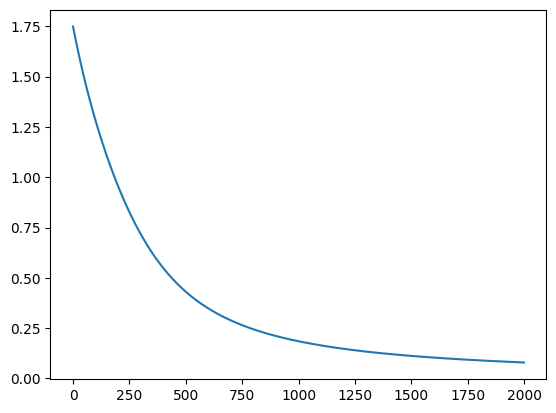

In [ ]:
plt.plot(error_hist)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, r2_score

f1 = f1_score(y_true, y_pred)
print("F1-Score:", f1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)

# Question 2 Part 4

In [ ]:
M_LR = LogisticRegression(random_state = 6)
M_LR.fit(Data_train_Scaled,Target_train)
print(f'Accuracy of train data in Logistic Regression Classifier = {M_LR.score(Data_train_Scaled, Target_train)}')
print(f'Accuracy of test data in Logistic Regression Classifier = {M_LR.score(Data_test_Scaled, Target_test)}')


Accuracy of train data in Logistic Regression Classifier = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 8 features, but LogisticRegression is expecting 9 features as input.

# Question 3 part 1

#### Download the dataset

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install --upgrade --no-cache-dir gdown
!gdown 1S6Ymrd6XLJ73nABqSfAk55KlhzR41mfx

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1S6Ymrd6XLJ73nABqSfAk55KlhzR41mfx
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 238kB/s]


Downloading dataset from Kaggle

In [ ]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/budincsevity/szeged-weather/data")

100%|██████████| 2.23M/2.23M [00:00<00:00, 75.1MB/s]

In [ ]:
df = pd.read_csv('/content/szeged-weather/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
print(f'Raw data: {df.isnull().sum()}')
print(df.shape)
df = df.dropna(how='any',axis=0)
print(f'Checked Data: {df.isnull().sum()}')
print(df.shape)

Raw data: Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
(96453, 12)
Checked Data: Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
(95936, 12)


In [ ]:
Selected_df1 = df[['Temperature (C)','Humidity','Apparent Temperature (C)', 'Wind Speed (km/h)',	'Wind Bearing (degrees)',	'Visibility (km)', 'Pressure (millibars)']]
Correlation_Matrix1 = Selected_df1.corr()
print(Correlation_Matrix1)
# Getting the Correlation Matrix for Latex
print(Correlation_Matrix1.to_latex(index=False))

                          Temperature (C)  Humidity  Apparent Temperature (C)  \
Temperature (C)                  1.000000 -0.632148                  0.992637   
Humidity                        -0.632148  1.000000                 -0.602390   
Apparent Temperature (C)         0.992637 -0.602390                  1.000000   
Wind Speed (km/h)                0.008304 -0.224569                 -0.057387   
Wind Bearing (degrees)           0.029937  0.000814                  0.028951   
Visibility (km)                  0.393719 -0.370511                  0.382589   
Pressure (millibars)            -0.005253  0.005375                 -0.000037   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008304                0.029937   
Humidity                          -0.224569                0.000814   
Apparent Temperature (C)          -0.057387                0.028951   
Wind Speed (km/h)                  1.000000                0.104366

Create Heatmap

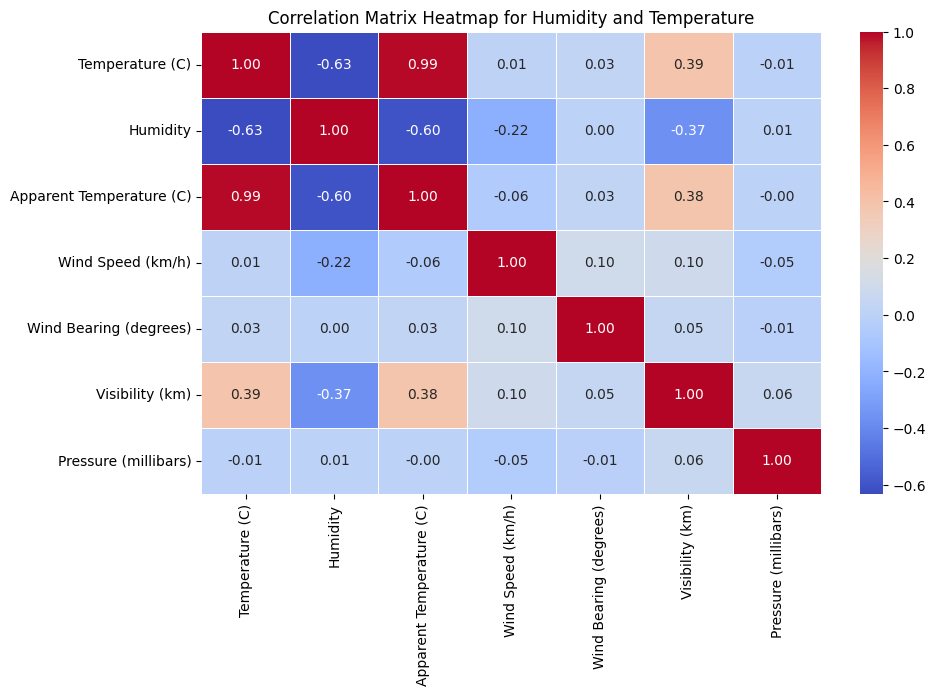

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(Correlation_Matrix1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Humidity and Temperature")
plt.show()

#### Histogram

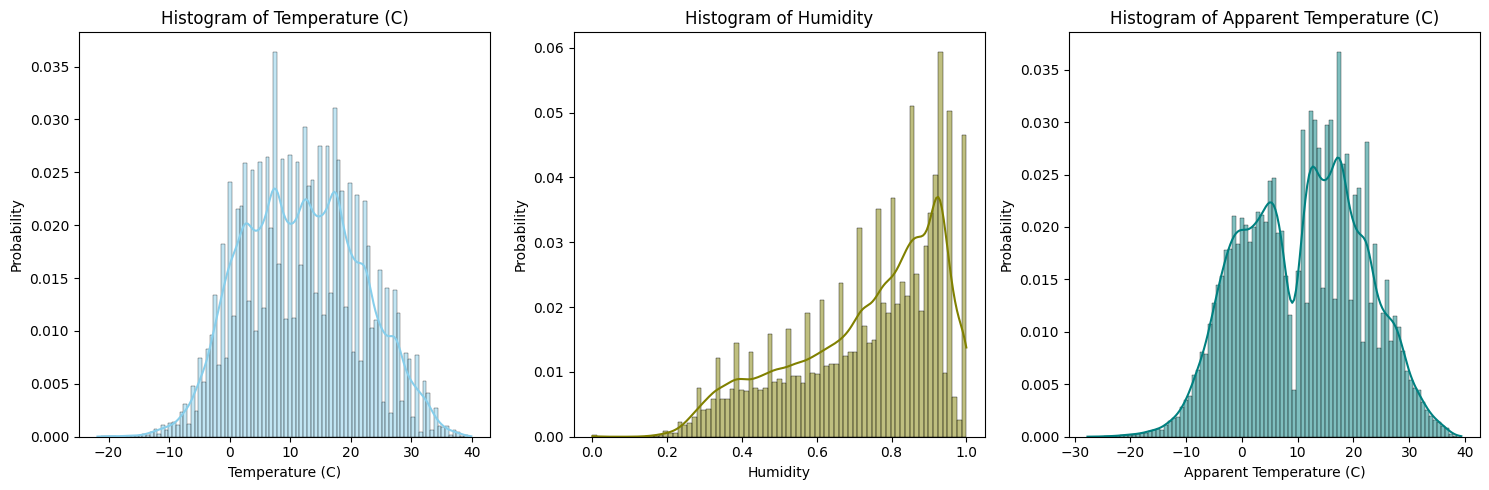

In [ ]:
CH_df = df[['Temperature (C)', 'Humidity', 'Apparent Temperature (C)']].copy()

colors = ['skyblue','olive','teal']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize

for i, feature in enumerate(CH_df.columns[:3]):
    sns.histplot(data=df, x=feature, ax=axes[i], stat = 'probability', kde=True, color=colors[i])
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# Question 3 part 2

### LS

In [ ]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self.coefficients

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

#### LS for Temperature (C)

In [46]:
Hum = df['Humidity']
Temp = df[['Temperature (C)','Apparent Temperature (C)']]

H_train, H_test, Temp_train, Temp_test = train_test_split(Hum, Temp, random_state = 24, test_size = 0.2, shuffle = False)

H_train = H_train.values.reshape(-1,1)
H_test = H_test.values.reshape(-1,1)

# Predict Temperature with LS method
LS1 = LinearRegressionLS()
LS_temp= LS1.fit(H_train, Temp_train['Temperature (C)'])

Temp_pred = LS1.predict(H_train)

Temp_pred_test = LS1.predict(H_test)

# Calculate Mean Squared Error for test data
MSE_temp = np.mean((Temp_test['Temperature (C)'] - Temp_pred_test)**2)
print("MSE of Temp by LS", MSE_temp)

MSE of Temp by LS 50.66040160802141


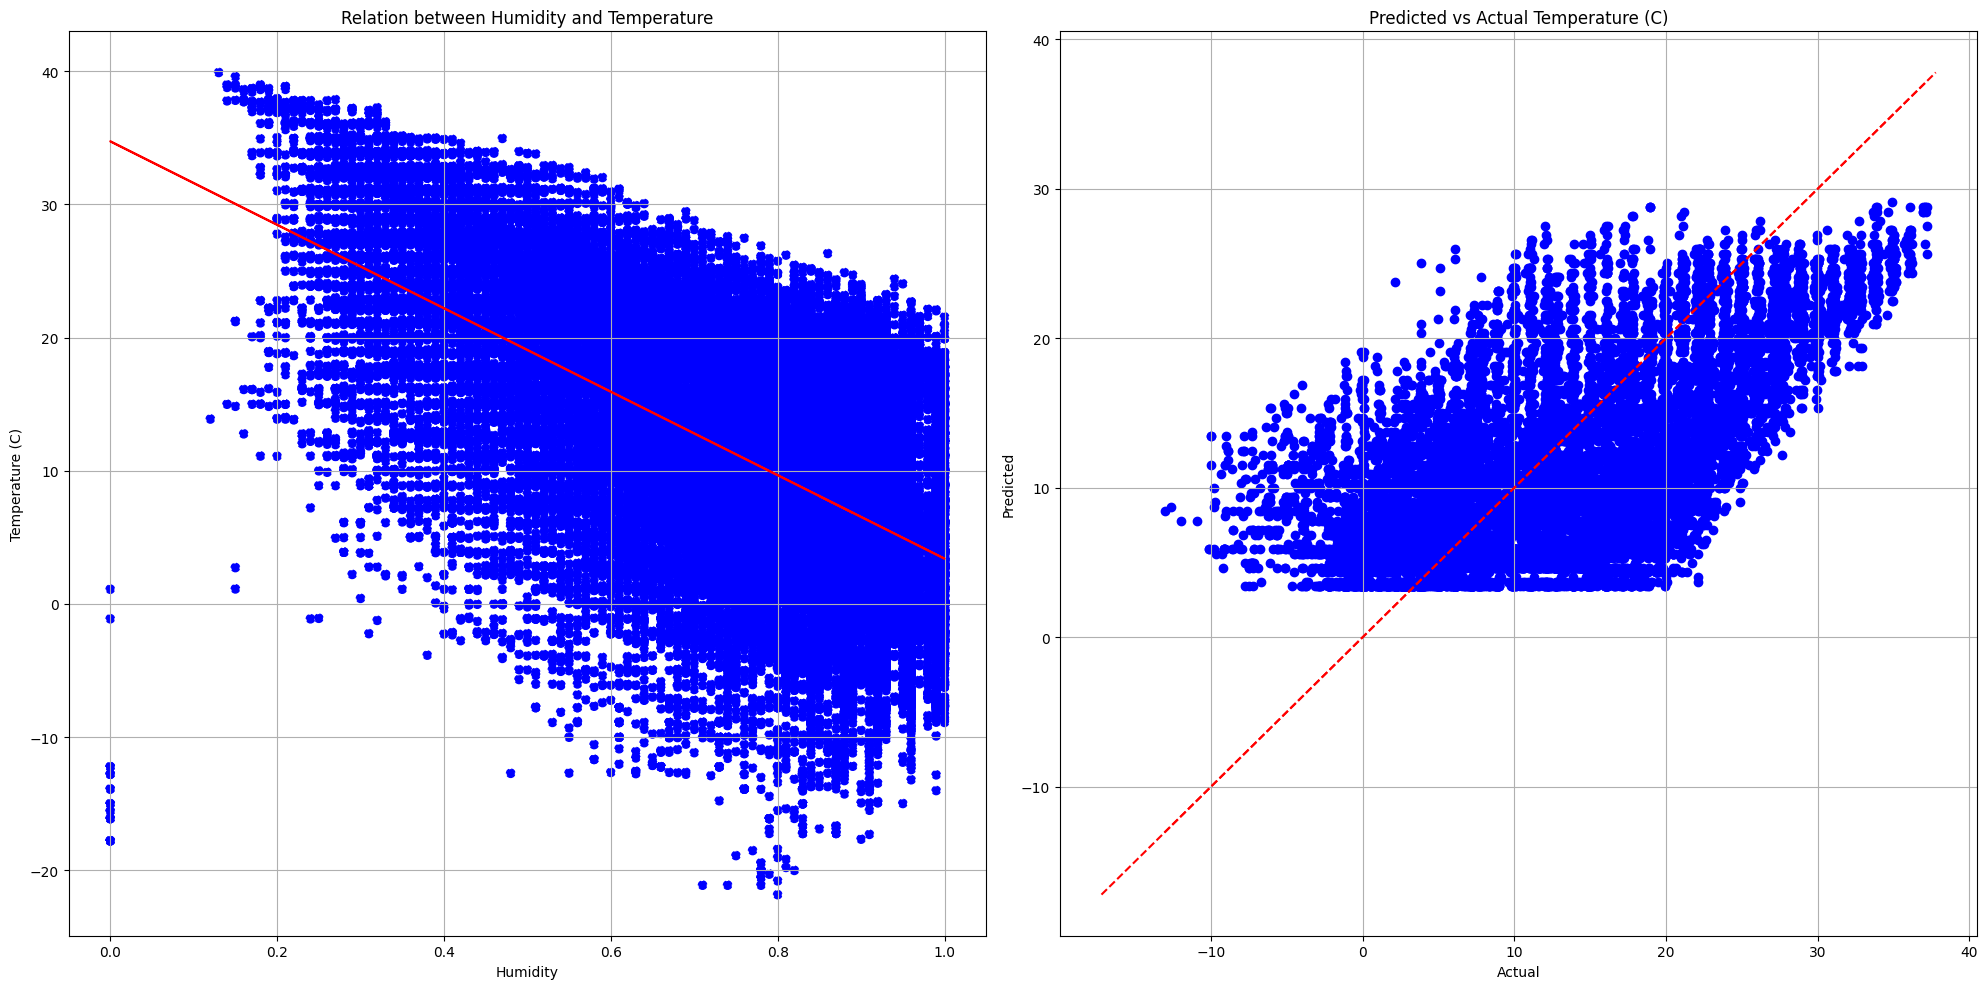

In [ ]:
# Plot
fig1, (ax11, ax12) = plt.subplots(1, 2, figsize=(20, 10))

ax11.scatter(Hum, Temp['Temperature (C)'], color='blue', linestyle='--')
ax11.plot(H_train, Temp_pred, color='red')
ax11.set_title('Relation between Humidity and Temperature')
ax11.set_xlabel('Humidity')
ax11.set_ylabel('Temperature (C)')
ax11.grid(True)

ax12.scatter(Temp_test['Temperature (C)'], Temp_pred_test, color='blue')
ax12.plot([Temp_test.min(), Temp_test.max()], [Temp_test.min(), Temp_test.max()], color='red', linestyle='--')
ax12.set_title('Predicted vs Actual Temperature (C)')
ax12.set_xlabel('Actual')
ax12.set_ylabel('Predicted')
ax12.grid(True)
fig1.tight_layout()  # Ensures proper spacing between subplots


#### LS for Apparent Temperature (C)

In [47]:
LS2 = LinearRegressionLS()

LS_Ap_Temp= LS2.fit(H_train, Temp_train['Apparent Temperature (C)'])

Ap_Temp_pred = LS2.predict(H_train)

Ap_Temp_pred_test = LS2.predict(H_test)

# Calculate Mean Squared Error for test data
MSE_Ap_temp = np.mean((Temp_test['Apparent Temperature (C)'] - Ap_Temp_pred_test)**2)
print("MSE of App_Temp by LS", MSE_Ap_temp)

MSE of App_Temp by LS 67.12644819081983


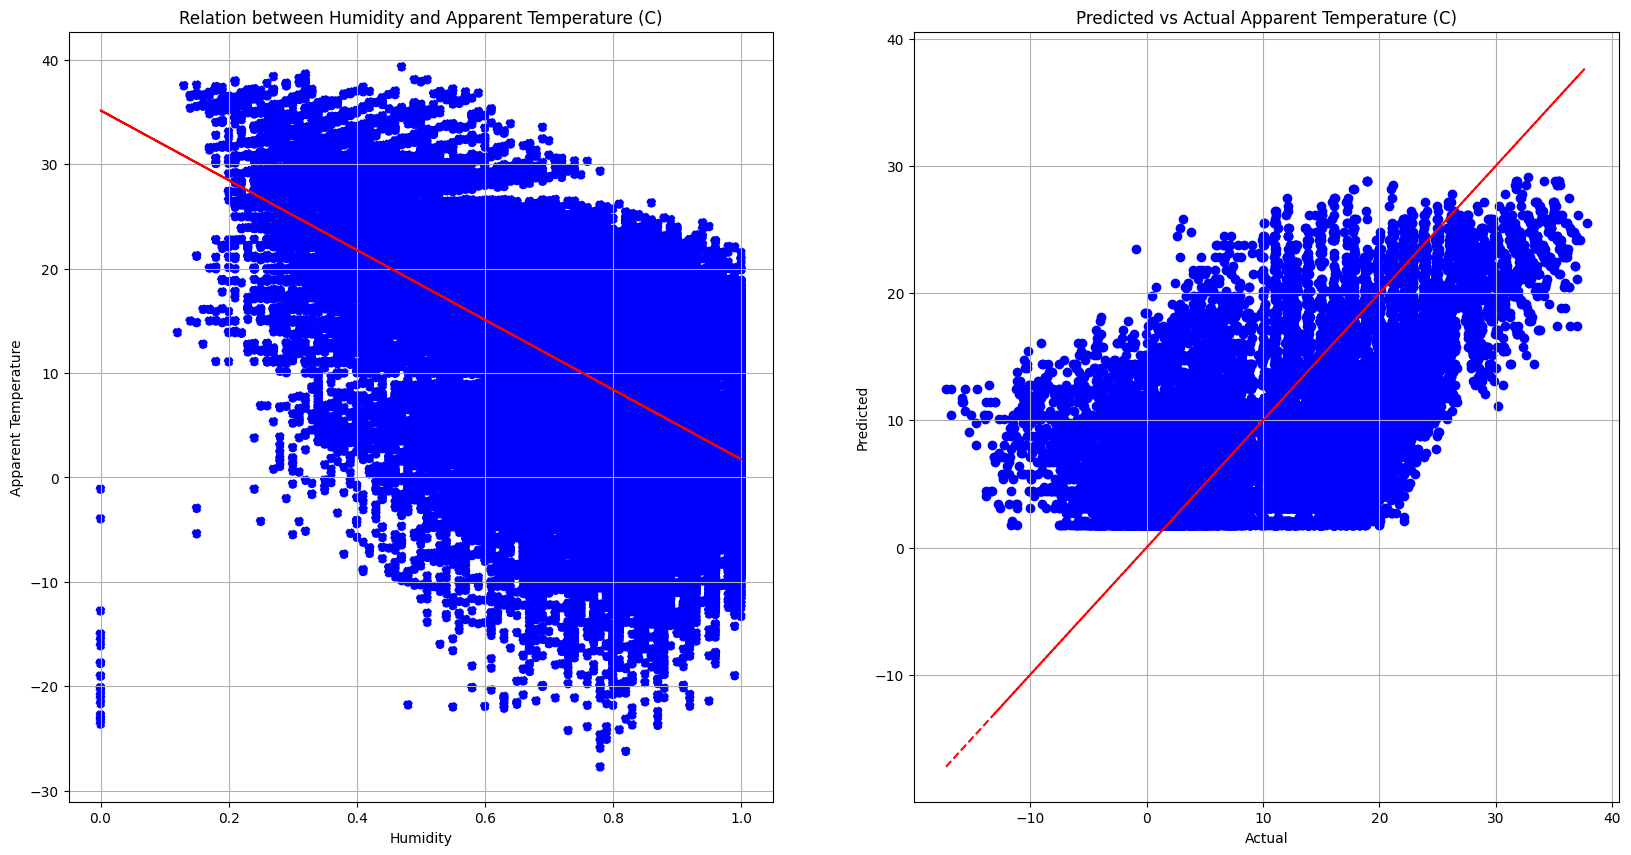

In [54]:
# Plot
fig2, (ax21, ax22) = plt.subplots(1, 2, figsize=(20, 10))

ax21.scatter(Hum, Temp['Apparent Temperature (C)'], color='blue', linestyle='--')
ax21.plot(H_train, Ap_Temp_pred, color='red')
ax21.set_title('Relation between Humidity and Apparent Temperature (C)')
ax21.set_xlabel('Humidity')
ax21.set_ylabel('Apparent Temperature')
ax21.grid(True)

ax22.scatter(Temp_test['Apparent Temperature (C)'], Ap_Temp_pred_test, color='blue')
ax22.plot([Temp_test.min(), Temp_test.max()], [Temp_test.min(), Temp_test.max()], color='red', linestyle='--')
ax22.set_title('Predicted vs Actual Apparent Temperature (C)')
ax22.set_xlabel('Actual')
ax22.set_ylabel('Predicted')
ax22.grid(True)

### RLS

In [ ]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

#### RLS for Temperature (C)

In [53]:
# Predict Temperature with RLS method
RLS1 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
Temp_train_np = np.array(Temp_train['Temperature (C)'])
Temp_train_np = Temp_train_np.reshape(-1,1)
Temp_e_RLS = RLS1.fit(H_train, Temp_train_np)

Temp_pred_RLS = RLS1.predict(H_train)

Temp_pred_RLS_test = RLS1.predict(H_test)

MSE_Temp_RLS = np.mean(np.array(Temp_e_RLS)**2)
print("MSE of Temp by RLS", MSE_Temp_RLS)

MSE of Temp by RLS 76.51966281992084


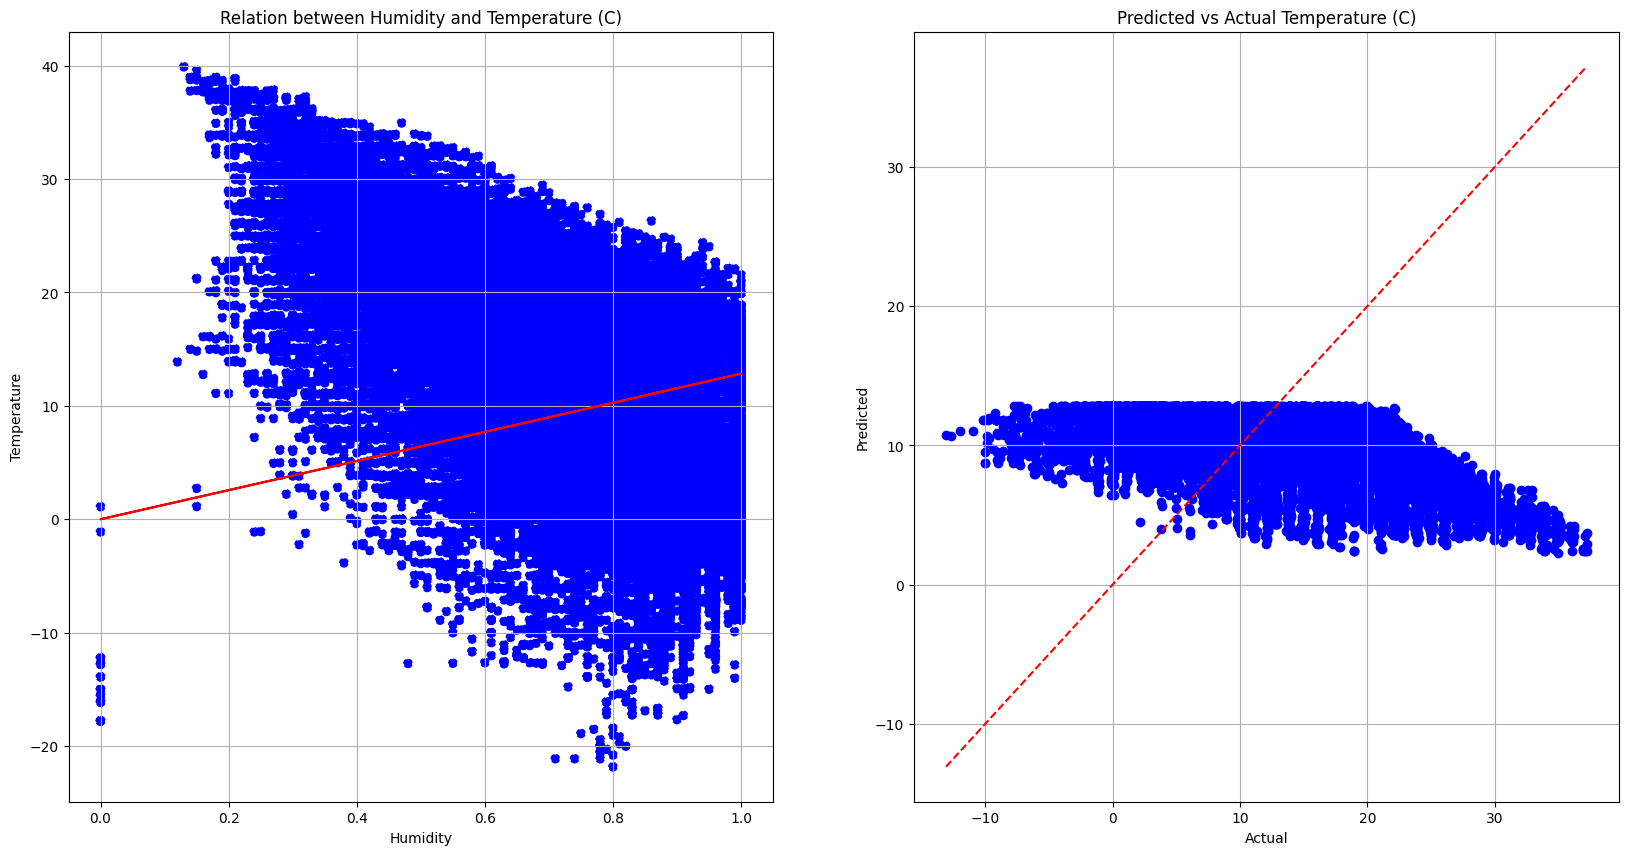

In [ ]:
# Plot

fig3, (ax31, ax32) = plt.subplots(1, 2, figsize=(20, 10))

ax31.scatter(Hum, Temp['Temperature (C)'], color='blue', linestyle='--')
ax31.plot(H_train, Temp_pred_RLS, color='red')
ax31.set_title('Relation between Humidity and Temperature (C)')
ax31.set_xlabel('Humidity')
ax31.set_ylabel('Temperature')
ax31.grid(True)

ax32.scatter(Temp_test['Temperature (C)'], Temp_pred_RLS_test, color='blue')
ax32.plot([Temp_test['Temperature (C)'].min(), Temp_test['Temperature (C)'].max()], [Temp_test['Temperature (C)'].min(), Temp_test['Temperature (C)'].max()], color='red', linestyle='--')
ax32.set_title('Predicted vs Actual Temperature (C)')
ax32.set_xlabel('Actual')
ax32.set_ylabel('Predicted')
ax32.grid(True)

#### RLS for Apparent Temperature (C)

In [49]:
# Predict Apparent Temperature with RLS method
RLS2 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
Temp_train_np = np.array(Temp_train['Apparent Temperature (C)'])
H_train, H_test, Temp_train, Temp_test

Temp_train_np = Temp_train_np.reshape(-1,1)

Ap_Temp_e_RLS = RLS2.fit(H_train, Temp_train_np)


Ap_Temp_pred_RLS = RLS2.predict(H_train)

Ap_Temp_pred_RLS_test = RLS2.predict(H_test)

MSE_Ap_Temp_RLS = np.mean(np.array(Ap_Temp_e_RLS)**2)
print("MSE of App_Temp by RLS", MSE_Ap_Temp_RLS)

MSE of App_Temp by RLS 82.00426393915465


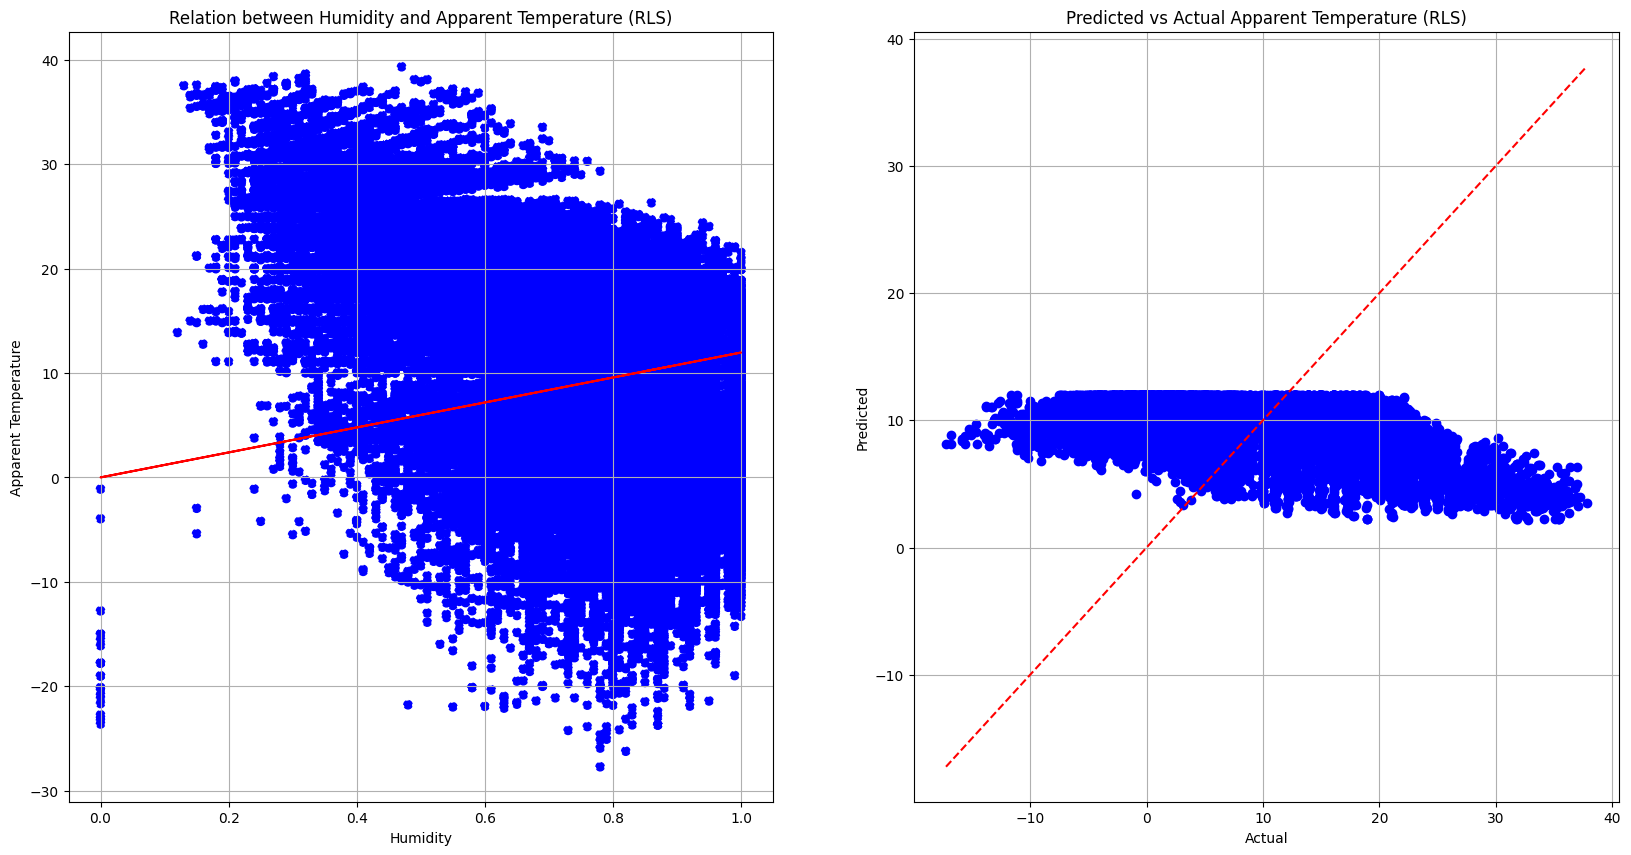

In [ ]:
# Plot

fig4, (ax41, ax42) = plt.subplots(1, 2, figsize=(20, 10))

ax41.scatter(Hum, Temp['Apparent Temperature (C)'], color='blue', linestyle='--')
ax41.plot(H_train, Ap_Temp_pred_RLS, color='red')
ax41.set_title('Relation between Humidity and Apparent Temperature (RLS)')
ax41.set_xlabel('Humidity')
ax41.set_ylabel('Apparent Temperature')
ax41.grid(True)

ax42.scatter(Temp_test['Apparent Temperature (C)'], Ap_Temp_pred_RLS_test, color='blue')
ax42.plot([Temp_test['Apparent Temperature (C)'].min(), Temp_test['Apparent Temperature (C)'].max()], [Temp_test['Apparent Temperature (C)'].min(), Temp_test['Apparent Temperature (C)'].max()], color='red', linestyle='--')
ax42.set_title('Predicted vs Actual Apparent Temperature (RLS)')
ax42.set_xlabel('Actual')
ax42.set_ylabel('Predicted')
ax42.grid(True)

### WLS

#### WLS for Temperature (C)

In [55]:
error_variance = 10  # Modify weights based on the estimated variance

# Calculate weights based on the Estimated Variance
weights = 1 / error_variance

# Fit the WLS model
Hum_with_intercept = sm.add_constant(H_train)  # Add intercept term

model = sm.WLS(Temp_train['Temperature (C)'], Hum_with_intercept, weights = weights)
result = model.fit()
print(result.summary())

                            WLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.404
Model:                            WLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 5.192e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:37:55   Log-Likelihood:            -2.6347e+05
No. Observations:               76748   AIC:                         5.270e+05
Df Residuals:                   76746   BIC:                         5.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7341      0.104    334.030      0.0

#### WLS for Apparent Temperature (C)

In [ ]:
error_variance = 10  # Modify weights based on the estimated variaqnce

# Calculate weights based on the Estimated Variance
weights = 1 / error_variance

# Fit the WLS model
Hum_with_intercept = sm.add_constant(H_train)  # Add intercept term

model = sm.WLS(Temp_train['Apparent Temperature (C)'], Hum_with_intercept, weights = weights)
result = model.fit()
print(result.summary())

                               WLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.366
Model:                                  WLS   Adj. R-squared:                  0.366
Method:                       Least Squares   F-statistic:                 4.436e+04
Date:                      Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                              19:30:53   Log-Likelihood:            -2.7448e+05
No. Observations:                     76748   AIC:                         5.490e+05
Df Residuals:                         76746   BIC:                         5.490e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------